## CCM Main Figures


In [1]:
#this notebook gather and plot all data necessary for CCM paper

In [2]:

import cytoflow as flow

# if your figures are too big or too small, you can scale them by changing matplotlib's DPI
import matplotlib
from scipy import stats
matplotlib.rc('figure', dpi = 160)
#https://github.com/cytoflow/cytoflow/blob/master/docs/examples-basic/Basic%20Cytometry.ipynb
#https://cytoflow.readthedocs.io/en/stable/user_manual/tutorials/tutorials.html#user-tutorials

import numpy as np
import pandas as pd
import skimage.io
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
import Colony_Analysis as ca
#import Plate_Shuffling as ps

from skimage.color import rgb2gray
from skimage.transform import rotate

import scipy.stats as stats
from scipy.stats import  ttest_ind

Bottom_color=[106/255,213/255,255/255]
Middle_color=[64/255,150/255,234/255]
Top_color=[0/255,77/255,128/255]
WT_color=[64/255,150/255,234/255]

edgecolor= [0/255,0/255,0/255]

import support as sp
import importlib

In [3]:
importlib.reload(sp)

<module 'support' from '/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/Colony_Analysis/Published_Code/CRI-SPA_CCM/support.py'>

# Figure 2

### FLow cytometry data 28.8.22

In [4]:
#parse plate order:
order_path='Raw_Data/28.8.22_FACS_HPLC/FACS_X.8.22.csv'


order_plate1 = pd.read_csv(order_path, sep=',', skiprows=0)
order_plate1 = order_plate1.iloc[0:8,0:13]
order_plate1 
order_plate2 = pd.read_csv(order_path, sep=',', skiprows=11)
order_plate2 = order_plate2.iloc[0:8,0:13]


In [5]:
order_plate2

,Plate2,1,2,3,4,5,6,7,8,9,10,11,12
0,A,0,5,4,3,2,1,0,NaN,NaN,NaN,NaN,NaN
1,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,NaN,NaN,NaN,NaN,ScCCM012A,ScCCM012B,ScCCM012C,NaN,NaN,NaN,NaN,NaN
3,D,NaN,0,5,4,3,2,1,0.0,ScCCM015A,ScCCM015B,ScCCM015C,ScCCM016A
4,E,ScCCM016B,ScCCM016C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G,NaN,NaN,BY4741C-A,BY4741C-B,BY4741C-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Pathway = {'C-':'','0':'','07':'AroyB','08':'AroyB*','12':'' ,
           '15':'Aroy', '16':'AroyB*','28':'AroyB*','32':'AroyB*'}

Sensor  = {'C-':'','00':'','07':'BenM*','08':'BenM*', '12':'BenM*','15':'BenM*', '16':'BenM*', '28':'BenM*','32':'BenM*'}


KO ={'C-':'','07':'WT','08':'WT','12':'WT', '15':'WT', '16':'WT','28':'Aro2Δ','32':'Aro4Δ'}

Background ={'C-':'BY','07':'DS','08':'DS', '12':'BY','15':'BY', '16':'BY','28':'BY','32':'BY'}



Pathway = {'C-':'','0':'','03':'','04':'','05':'AroyB', '06':'AroyB*','07':'AroyB','08':'AroyB*',
           '09':'Aroy', '10':'AroyB*', '11':'', '12':'', '13':'AroyB' ,'14':'AroyB*' ,
           '15':'Aroy', '16':'AroyB*',
           '17':'Aroy','18':'Aroy','19':'AroyB*','20':'AroyB*',
           '21':'Aroy', '22':'Aroy', '23':'AroyB*','24':'AroyB*',
              '25':'Aroy', '26':'AroyB*','27':'Aroy','28':'AroyB*',
           '29':'AroyB', '30':'AroyB*','31':'AroyB','32':'AroyB*'}

Sensor  = {'C-':'','00':'','03':'BenM','04':'BenM*','05':'BenM',  '06':'BenM','07':'BenM*','08':'BenM*',
           '09':'', '10':'', '11':'BenM', '12':'BenM*', '13':'BenM' ,'14':'BenM' ,'15':'BenM*', '16':'BenM*',
          '17':'BenM','18':'BenM','19':'BenM','20':'BenM','21':'BenM*', '22':'BenM*', '23':'BenM*','24':'BenM*',
           '25':'BenM', '26':'BenM','27':'BenM*', '28':'BenM*','29':'BenM', '30':'BenM','31':'BenM*', '32':'BenM*'}


KO ={'C-':'', '03':'WT','04':'WT','05':'WT','06':'WT','07':'WT','08':'WT',
     '09':'WT', '10':'WT', '11':'WT', '12':'WT', '13':'WT' ,'14':'WT' ,'15':'WT', '16':'WT',
     '17':'ZWF1Δ', '18':'TAL1Δ', '19':'ZWF1Δ', '20':'TAL1Δ',  '21':'ZWF1Δ', '22':'TAL1Δ' ,  '23':'ZWF1Δ', '24':'TAL1Δ',
    '25':'Aro2Δ', '26':'Aro2Δ','27':'Aro2Δ', '28':'Aro2Δ','29':'Aro4Δ','30':'Aro4Δ', '31':'Aro4Δ','32':'Aro4Δ'}

Background ={ '03':'DS','04':'DS','05':'DS','06':'DS','07':'DS','08':'DS','C-':'BY',
            '09':'BY', '10':'BY', '11':'BY', '12':'BY', '13':'BY' ,'14':'BY' ,'15':'BY', '16':'BY',
          '17':'BY','18':'BY','19':'BY','20':'BY','21':'BY', '22':'BY', '23':'BY','24':'BY',
            '25':'BY', '26':'BY','27':'BY', '28':'BY'}

In [7]:
#choose time point for figure
data_path_plate1 = 'Raw_Data/28.8.22_FACS_HPLC/72H/Plate1/'
data_path_plate2 = 'Raw_Data/28.8.22_FACS_HPLC/72H/Plate2/'


#letter to int conversion:
alphabet={}
for i,L in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    alphabet[L] = i +1
    
# store experimental parameters in Dictionaries
CCM_conc_dict= {0:0, 1:710.5/800, 2:710.5/80, 3:710.5/8, 4:710.5/4, 5:710.5/2, 6:710.}  #mg.L-1
#CCM_conc_dict= {0:0, 1:0.00625, 2:0.0625, 3:0.625, 4:1.25, 5:2.5, 6:5}  #mg.L-1




#parse the name of the files
file_name_plate1={}
file_name_plate2={}

for filename in os.listdir(data_path_plate1):
    if '_Sample' in filename:
        i = filename.index('_Sample') 
        row=alphabet[filename[0]]
        col= int(filename[1:i])
        file_name_plate1[(row,col)]= data_path_plate1+ filename
        
for filename in os.listdir(data_path_plate2):
    if '_Sample' in filename:
        i = filename.index('_Sample') 
        row=alphabet[filename[0]]
        col= int(filename[1:i])
        file_name_plate2[(row,col)]= data_path_plate2+ filename


           

In [12]:
%%time
#parse plate 1 data
tubes ={}
check ={}

t=0

#we add the final row on the other plate as row 9
for (r,c), path in file_name_plate1.items():
    #strain name
    #print( order_plate1.iloc[r-1][c])
    strain= order_plate1.iloc[r-1][c][0:8] 
    replicate = order_plate1.iloc[r-1][c][8]
    ## CCM level
    if len(order_plate1.iloc[r-1][c])>9:
        level= str(order_plate1.iloc[r-1][c][-1])
    else:
        level= 0
    pathway=Pathway[str(strain[-2:])]
    sensor=Sensor[str(strain[-2:])]
    background = Background[str(strain[-2:])]
    
    tubes[t]=flow.Tube(file = path ,conditions = { 'Strain': strain, 'CCM': level, 'Replicate': replicate,
                                                      'Pathway':pathway, 'Sensor':sensor, 'Background':background})
    t+=1
  


tubes= [tubes[t] for t in tubes.keys()]     
import_op = flow.ImportOp(conditions = {'Strain': 'str','CCM': 'str','Replicate':'str','Pathway':'str','Sensor':'str','Background':'str' }, tubes = tubes, events=12000)
plate1 = import_op.apply()


#parse plate2 data
tubes ={}
check ={}

for (r,c), path in file_name_plate2.items():

    #strain name
    strain= order_plate2.iloc[r-1][c][0:8] 
    replicate = order_plate2.iloc[r-1][c][8]
    ## CCM level
    if len(order_plate2.iloc[r-1][c])>9:
        level= str(order_plate2.iloc[r-1][c][-1])
    else:
        level= str(0)
    strain_num = str(strain[-2:])
    
    pathway=Pathway[strain_num ]
    sensor=Sensor[strain_num]
    ko = KO[strain_num]
    background = Background[strain_num]
  #  print(strain, pathway, sensor , ko)
    tubes[t]=flow.Tube(file = path ,conditions = { 'Strain': strain, 'CCM': level, 'Replicate': replicate,
                                                      'Pathway':pathway, 'Sensor':sensor, 'Background':background})
    check[t]=[strain,level,replicate,pathway,sensor]
    t+=1
    
    
tubes= [tubes[t] for t in tubes.keys()]     
import_op = flow.ImportOp(conditions = {'Strain': 'str','CCM': 'str','Replicate':'str','Pathway':'str','Sensor':'str','Background':'str'  }, tubes = tubes, events=12000)
plate2 = import_op.apply()





CPU times: user 14.8 s, sys: 610 ms, total: 15.4 s
Wall time: 16.1 s


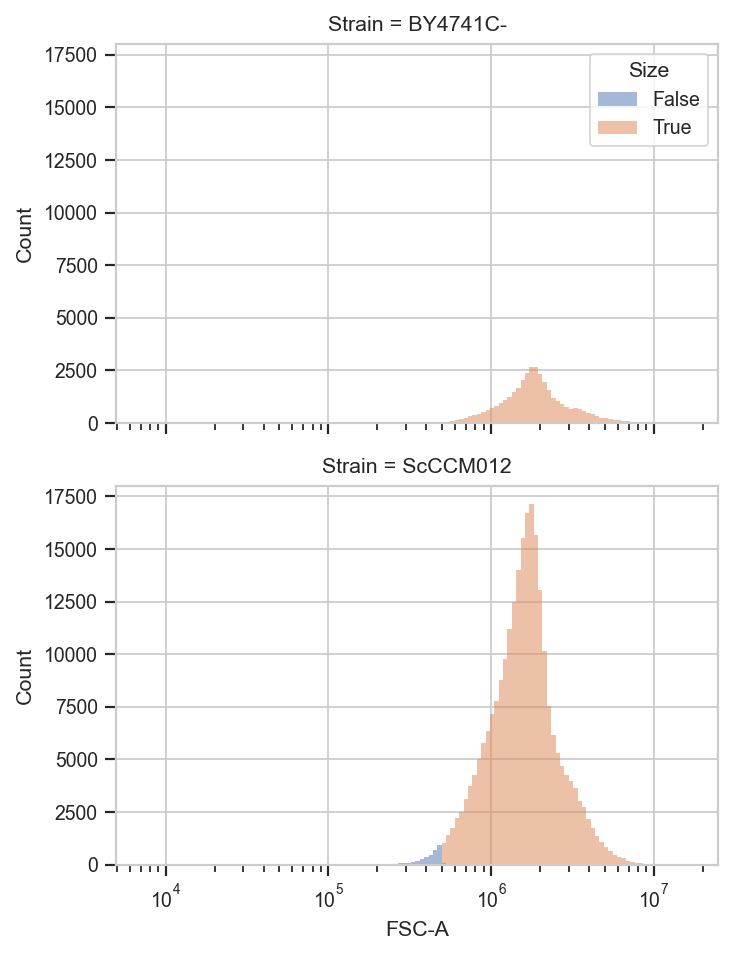

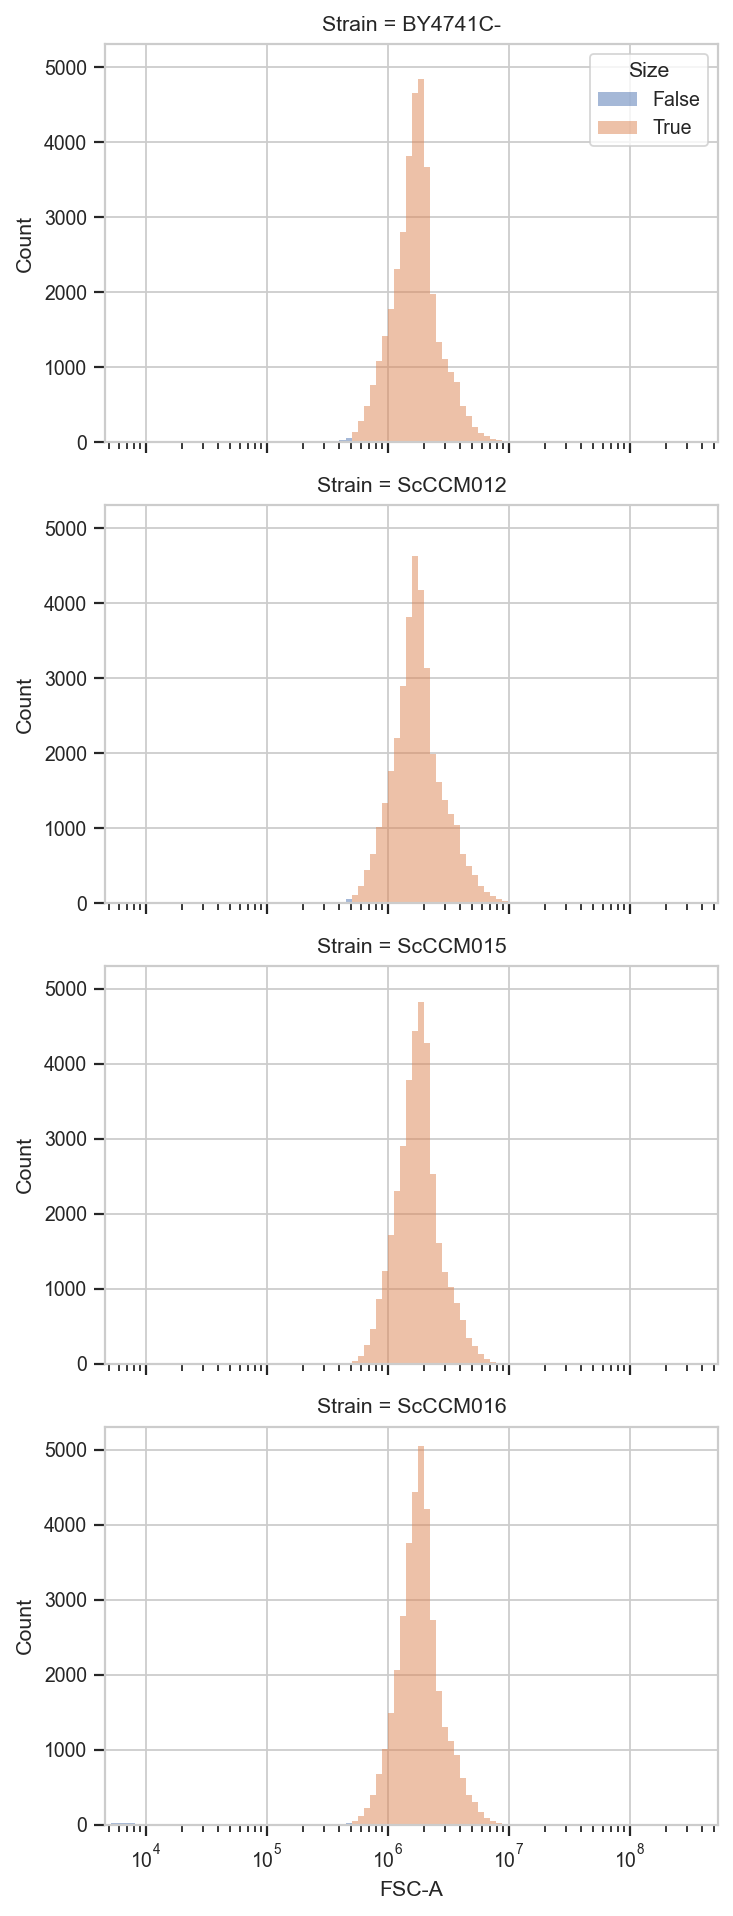

In [13]:
#gate plate1
#apply size threshold to remove debris
thresh = flow.ThresholdOp(name = "Size",
                          channel = "FSC-A",
                          threshold = 5*10e4)
plate1Gated = thresh.apply(plate1)

flow.HistogramView(channel = "FSC-A",
                scale = "log",
                yfacet = 'Strain',
                huefacet='Size').plot(plate1Gated)


#gate plate2
#apply size threshold to remove debris
thresh = flow.ThresholdOp(name = "Size",
                          channel = "FSC-A",
                          threshold = 5*10e4)
plate2Gated = thresh.apply(plate2)


flow.HistogramView(channel = "FSC-A",
                scale = "log",
                yfacet = 'Strain',
                huefacet='Size').plot(plate2Gated)

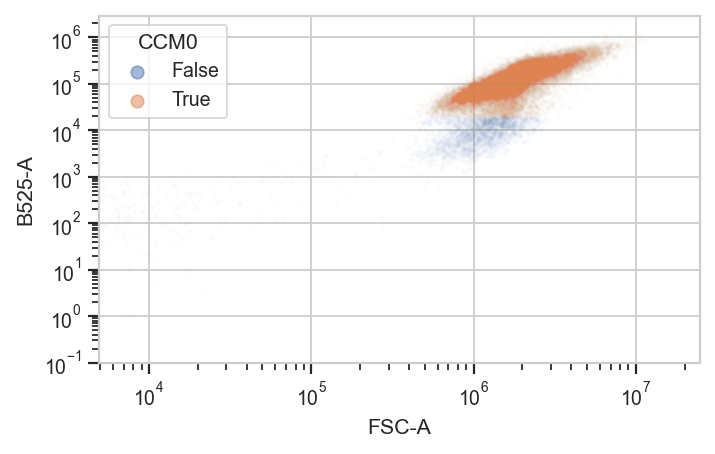

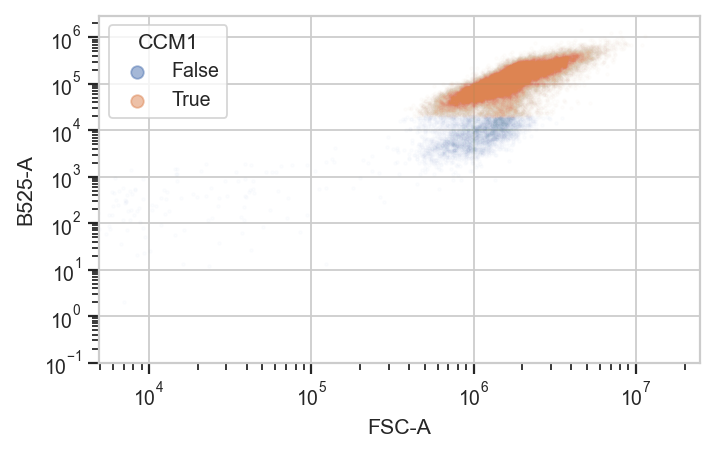

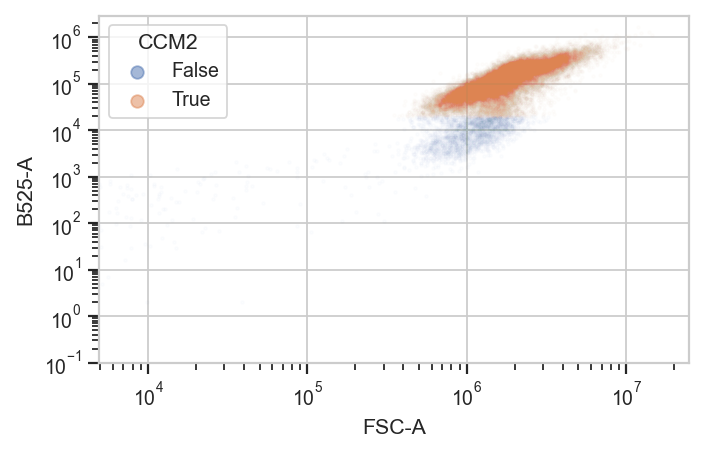

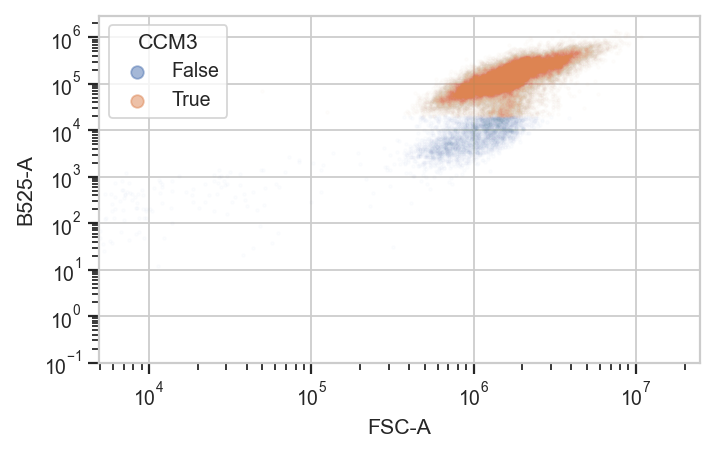

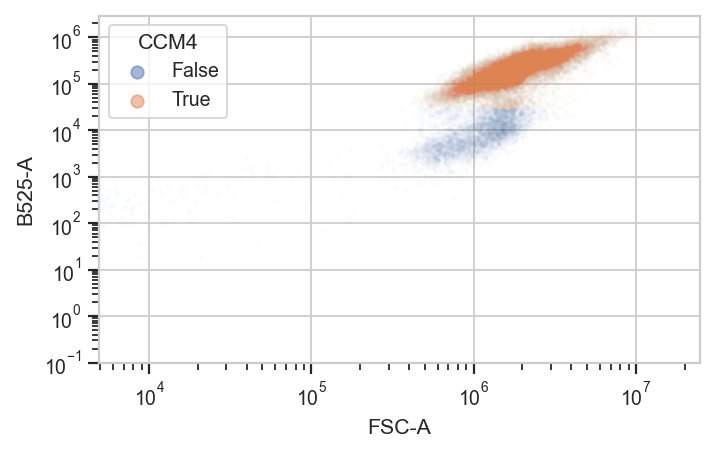

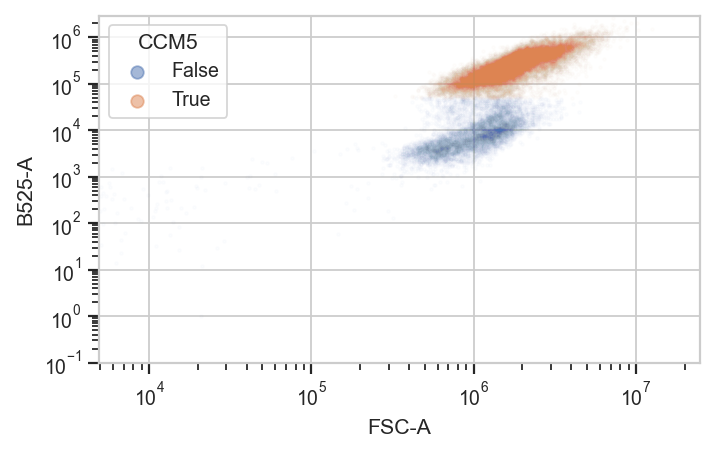

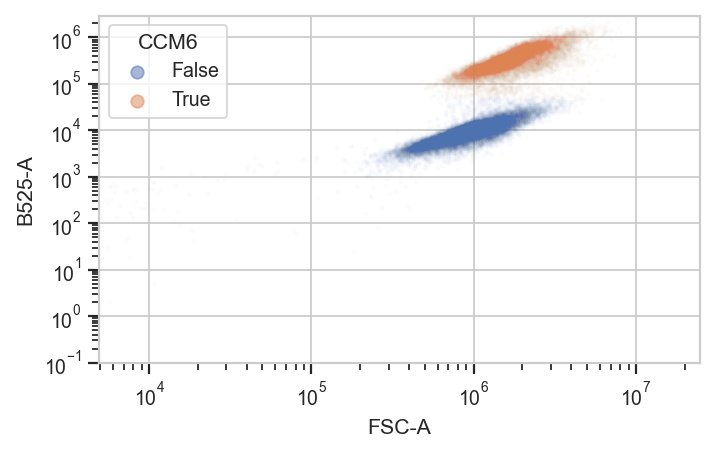

In [14]:



## Create fluo gates 6 gates for CCM
#for CCM level 6:
gate= (plate1Gated.data['B525-A']>50000)
plate1Gated.add_condition('CCM6','bool', gate)
#for CCM level 5:
gate= (plate1Gated.data['B525-A']>50000)
plate1Gated.add_condition('CCM5','bool', gate)
#for CCM level 4:
gate= (plate1Gated.data['B525-A']>30000)
plate1Gated.add_condition('CCM4','bool', gate)
#for CCM level 3:
gate= (plate1Gated.data['B525-A']>20000)
plate1Gated.add_condition('CCM3','bool', gate)
#for CCM level 2:
gate= (plate1Gated.data['B525-A']>20000)
plate1Gated.add_condition('CCM2','bool', gate)
#for CCM level 1:
gate= (plate1Gated.data['B525-A']>20000)
plate1Gated.add_condition('CCM1','bool', gate)
#for CCM level 0:
gate= (plate1Gated.data['B525-A']>20000)
plate1Gated.add_condition('CCM0','bool', gate)

##Check correct gating here:
for i, CCM in CCM_conc_dict.items():
    
    flow.ScatterplotView(xchannel = "FSC-A",
                     ychannel = "B525-A",
                     yscale = "log",
                     xscale = "log",
                     subset = "(Strain == 'ScCCM012')&(CCM=='"+str(i)+"')",
                     huefacet='CCM'+str(i)).plot(plate1Gated, alpha = 0.01) #hue facet color according to gate
    plt.show()
    
    

/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator


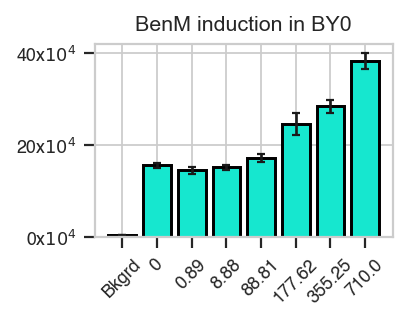

In [15]:
#plot Fluorescence Results


metric='B525-A'
X=[]
Y=[]
Yerr=[]
colors =[]
tick_names=[]

sensor_color=[22/255,231/255,207/255]
producer_color=[64/255,150/255,234/255]

edgecolor= [0/255,0/255,0/255]


ex= plate2Gated
##add the control without fluorescent protein
strain = 'BY4741C-'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == str(0))  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y.append(ABC)  
tick_names.append('Bkgrd')
colors.append(producer_color)



ex= plate1Gated
strain = 'ScCCM012' ## BenM(MP17_D08) strain at different [CCM]

for i, CCM in CCM_conc_dict.items():
    ABC=[]
    for replicate in ['A','B','C']:
        i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == str(i))  & (ex.data['Replicate'] == replicate)
        i2plot =i2plot &(ex.data['CCM'+str(i)] == True) 
        
        ABC.append(ex.data[i2plot][metric].mean())
    colors.append(sensor_color)
    X.append(CCM)
    Y.append(ABC)
    
[tick_names.append(str(np.round(CCM_conc_dict[i],2))) for i in range(7)]


#Y = np.log10(np.stack(Y))
Y = np.stack(Y)
H=1.6
fig, ax = plt.subplots(figsize=(3/2*H,H))

ax.bar(np.arange(len(Y)),Y.mean(axis=1),yerr=Y.std(axis=1), 
       color=colors,edgecolor=edgecolor,capsize=H,linewidth =H/1.2)


tick_loc = np.arange(8)
ax.xaxis.set_ticks(tick_loc)
#ax.set_title('BenM*  induction curve',fontsize=18)
ax.set_xticklabels(tick_names,rotation = 45, size=H*5, fontname='Helvetica')
#ax.set_ylabel('Fluorescence',fontsize=20, fontname='Helvetica')
ax.set_ylim([0.0*10e5,0.42*10e5 ])
#ax.set_ylim([3.5,5.5 ])

ylabels = ax.get_yticks()
ylabels = [int(y)/10000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^4$' for y in ylabels]
ax.set_yticklabels(ylabels, size=H*5, fontname='Helvetica')

fig.set_size_inches(3/2*H,H)
ax.set_title('BenM induction in BY0')
plt.show()


In [16]:
#Compute significance P.values
#the first 3 CCM conc are not significant, we pool them and look at each conc in comparison to the pool
for i in range(1,8):
    print(X[i-1],stats.ttest_ind(Y[1:4].flatten(), Y[i], equal_var=True))


0 Ttest_indResult(statistic=-0.9945623230551763, pvalue=0.3434052140893168)
0.888125 Ttest_indResult(statistic=1.1089155939843633, pvalue=0.2934227547167217)
8.88125 Ttest_indResult(statistic=-0.16047588726258627, pvalue=0.8757016452015851)
88.8125 Ttest_indResult(statistic=-3.581274856229661, pvalue=0.005001091824931819)
177.625 Ttest_indResult(statistic=-9.654988299111928, pvalue=2.1908947616144254e-06)
355.25 Ttest_indResult(statistic=-18.861360037180916, pvalue=3.803477284405443e-09)
710.0 Ttest_indResult(statistic=-28.972602291985893, pvalue=5.5930767181015434e-11)


#### load HPLC data from 28.8.22

In [17]:
##
data_path= 'Raw_Data/28.8.22_FACS_HPLC/'
Data_CCM=pd.read_excel(data_path+ 'HPLC28.8.22.xlsx', skiprows=6,sheet_name='CCM' ).astype(str)
#Data=Data.iloc[8:,:]
Data_CCM=Data_CCM.replace('n.a.',0)

# the samples were diluted 8X during sample prep. We remultiply back X8
back_dilute=8


In [18]:
default_color=[64/255,150/255,234/255]


/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


HPLC
variances: AroyB,AroyB*: 35.51236266666661 56.22384355555551
HPLC mean (mg/L): AroyB,AroyB*: 138.672 167.99733333333333
titer increase: 0.21147263566785893
Ttest_indResult(statistic=-4.329996718904889, pvalue=0.012349743770108381)
FLOW
variances: AroyB,AroyB*: 148718058.28679672 336156750.3078578
Flow mean (A.U): AroyB,AroyB*: 463932.06639376056 502319.03342248686
flow increase: inf
Ttest_indResult(statistic=-2.4653806721568268, pvalue=0.06928961551242026)


/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in double_scalars


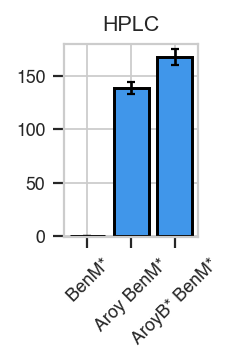

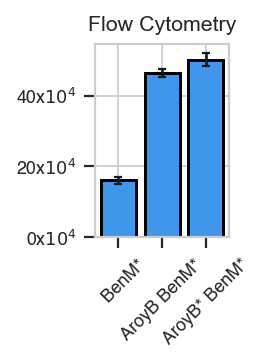

In [19]:
## plot HPLC data
X_HPLC=[]
Y_HPLC=[]
for s in [ 12,15,16]:#4,  3,5,6,4,7,8
    s= str(s)
    i= Data_CCM['Injection Name'].str.match(str(s)+'\w')
    X_HPLC.append(Pathway[s]+' '+Sensor[s])
    y =Data_CCM['Amount'][i].values.astype(str)
    #this one liner replaces commas to dots 
    y = [s.replace(',','.') if ',' in s else s for s in y ]

    Y_HPLC.append(y)
Y_HPLC = np.stack(Y_HPLC).astype(float)*back_dilute

H=1.6 #figure hight
fig, axs = plt.subplots(figsize=(1.625*H/2.4,H))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

default_color=[64/255,150/255,234/255]
edgecolor= [0,0,0]
axs.bar(np.arange(Y_HPLC.shape[0]) ,Y_HPLC.mean(axis=1),yerr=Y_HPLC.std(axis=1),
       color=default_color,edgecolor= edgecolor,linewidth=H/1.2,ecolor=edgecolor,capsize=H)
axs.xaxis.set_ticks(np.arange(Y_HPLC.shape[0]))
axs.tick_params(axis='both', which='major', labelsize=H*5)
#axs[0].set_ylabel('CCM (mg/L)')
axs.set_xticklabels(X_HPLC,rotation = 45, size=H*5, fontname='Helvetica')

axs.tick_params(axis='y',labelsize=H*5)
axs.set_title('HPLC')
axs.set_ylim([-1,180 ])
ylabels = axs.get_yticks()
ylabels = [str(int(y)) for y in ylabels]
axs.set_yticklabels(ylabels, size=H*5, fontname='Helvetica')


## plot Flow cytometry data ## ## ## ## ## ## ## ## 
metric='B525-A'
Y_Flow=[]
colors =[]
tick_names=[]
ex= plate2Gated
##add the BenM* AroyB-WT strain
strain = 'ScCCM012'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == str(0))  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC)  
tick_names.append('   BenM*')
colors.append(producer_color)


ex= plate2Gated
##add the BenM* AroyB-WT strain
strain = 'ScCCM015'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == str(0))  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC)  
tick_names.append('AroyB BenM*')
colors.append(producer_color)

##add the BenM* AroyB-P146T strain
strain = 'ScCCM016'
CCM =0
ABC=[]
for replicate in ['A','B','C']:
    i2plot =(ex.data['Strain'] == strain) & (ex.data['Size'] == True) & (ex.data['CCM'] == str(0))  & (ex.data['Replicate'] == replicate)
    ABC.append(ex.data[i2plot][metric].mean())
Y_Flow.append(ABC)  
tick_names.append('AroyB* BenM*')
colors.append(producer_color)

#Y_Flow = np.log10(np.stack(Y_Flow))
Y_Flow = np.stack(Y_Flow)

fig, axs = plt.subplots(figsize=(1.625*H/2.4,H))

axs.bar(np.arange(len(Y_Flow)),Y_Flow.mean(axis=1),yerr=Y_Flow.std(axis=1), 
       color=colors,edgecolor=edgecolor,capsize=H,linewidth =H/1.2)
tick_loc = np.arange(3)

axs.xaxis.set_ticks(tick_loc)
axs.set_title('Flow Cytometry')
axs.set_xticklabels(tick_names,rotation = 45, size=H*5, fontname='Helvetica')
#axs[1].set_ylabel('Fluorescence (AU)')
ylabels = axs.get_yticks()
ylabels = [int(y)/10000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^4$' for y in ylabels]
axs.set_yticklabels(ylabels, size=H*5, fontname='Helvetica')
##perform t-test on HPLC

## check for equal variance
print('HPLC')
print('variances: AroyB,AroyB*:',Y_HPLC[1].var(),Y_HPLC[2].var())
# Perform the two sample t-test with equal variances
print('HPLC mean (mg/L): AroyB,AroyB*:',Y_HPLC[1].mean(),Y_HPLC[2].mean() )
print('titer increase:',(Y_HPLC[2].mean()-Y_HPLC[1].mean()) /Y_HPLC[1].mean()  )
print(stats.ttest_ind(a=Y_HPLC[1], b=Y_HPLC[2], equal_var=True))

##perform t-test on Flowcyto
print('FLOW')
## check for equal variance
print('variances: AroyB,AroyB*:',Y_Flow[1].var(),Y_Flow[2].var())
# Perform the two sample t-test with equal variances
print('Flow mean (A.U): AroyB,AroyB*:',Y_Flow[1].mean(),Y_Flow[2].mean() )
print('flow increase:',10**(Y_Flow[2].mean()-Y_Flow[1].mean())  )
print(stats.ttest_ind(a=Y_Flow[1], b=Y_Flow[2], equal_var=True))




## Plot KO controls figure

In [20]:
# get HPLC for KO
data_path= 'Raw_Data/3.10.22_HPLC/'
HPLC=pd.read_excel(data_path+ '3.10.22.xlsx',header=1,skiprows=9)
HPLC=HPLC.iloc[0:60,:]
HPLC=HPLC.replace('n.a.',0)

In [21]:
# the samples were diluted 10X during sample prep. We remultiply back X10
X_HPLC=[]
Y_HPLC=[]
dilution_factor=8
#match strain name to HPLC label
strains ={'WT':'16','ARO4Δ':'32','ARO2Δ':'28'}

for strain, ID in strains.items():
    #for replicate in ['A','B','C']:#4,  3,5,6,4,7,8
        print(strain, ID)
        i= HPLC['Injection Name'].str.match(ID+'_'+'\w')

        X_HPLC.append(strain)
        y_HPLC = HPLC['Amount'][i].values
        #convert Y data into float (need to change ',' to '.'):
        y_HPLC = [y.replace(',','.') for y in y_HPLC]
        y_HPLC = np.array(y_HPLC).astype(float)*dilution_factor
        Y_HPLC.append(y_HPLC)



WT 16
ARO4Δ 32
ARO2Δ 28


/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/ColonyAnalysisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


(0.0, 400.0)

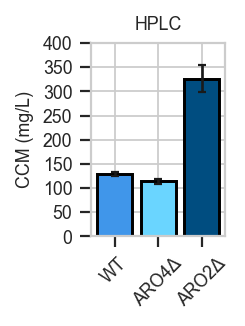

In [22]:


Y_HPLC = np.stack(Y_HPLC)
H=1.6 #figure hight
fig, ax = plt.subplots(figsize=(1.625*H/2.4,H))
low_color= [106/255,213/255,255/255]
high_color= [0/255,77/255,128/255]

colors=[default_color,low_color,high_color]
ax.bar(np.arange(Y_HPLC.shape[0]) ,Y_HPLC.mean(axis=1),yerr=Y_HPLC.std(axis=1),
      color=colors,edgecolor=edgecolor,capsize=H,linewidth =H/1.2)
ax.xaxis.set_ticks(np.arange(Y_HPLC.shape[0]))
ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_ylabel('CCM (mg/L)', size=H*5)
ax.set_xticklabels(X_HPLC,rotation = 45, size=H*5)
ax.set_title('HPLC')

ylabels = ax.get_yticks()
ylabels = [str(int(y)) for y in ylabels]
ax.set_yticklabels(ylabels, size=H*5)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(H*5)
ax.set_ylim([0,400])


## Plot Flow Cytometry of KO controls

Sc_CCM 16 [0.00131906 0.00121121 0.00126972]
Sc_CCM 32 [0.0012385  0.00125451 0.00124751 0.00127222]
Sc_CCM 28 [0.00185654 0.00201616 0.00188116 0.00204952]


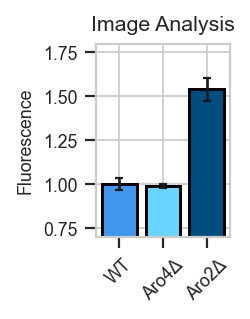

In [23]:
#load data from 10.10.22
path = 'raw_data/10.10.22_array/'
Agar_Fluo =pd.read_csv(path + 'QD.csv', sep=',')

metric='corrected_mean_intensity.48'
i_nan = Agar_Fluo[metric].isna()==0
Name=[]
Std=[]
Fluo=[]
Size=[]



#we ignore Nan rows:
Plate_Data= Agar_Fluo[i_nan].copy()
strains=['Sc_CCM 16','Sc_CCM 32','Sc_CCM 28']
#fetch fluorescence of strain without GFP:
i = Plate_Data.gene== 'Sc_CCM 16'
background_fluo = Plate_Data[i][metric].values.mean()
for strain in  strains:
    if 'Sc_CCM' in strain:
        
        i = Plate_Data.gene== strain
        fluo = Plate_Data[i][metric].values
        print(strain, fluo)
        num_strain= strain[-2:]
        name=  KO[num_strain]
        Name.append(name)
        Fluo.append(fluo/background_fluo)

    

H=1.6 #figure hight
fig, ax = plt.subplots(figsize=(1.625*H/2.4,H))

colors=[default_color,low_color, high_color]
Ymean= [np.mean(y) for y in Fluo]
Ystd= [np.std(y) for y in Fluo]

ax.bar(np.arange(len(Ymean)),Ymean,yerr=Ystd, color= colors,edgecolor=edgecolor,capsize=H,linewidth =H/1.2)
tick_loc = np.arange(len(Ymean))
ax.xaxis.set_ticks(tick_loc)
ax.set_title('')
ax.set_xticklabels(Name,rotation = 45, size=H*5)
ax.set_ylabel('Fluorescence', size=H*5)
ax.set_title('Image Analysis')

#ax.set_xlim([-0.5,13])
ax.set_ylim([0.7,1.8 ])
ax.tick_params(axis='both', which='major', labelsize=H*5)


In [24]:
## check for equal variance
print('image analysis')
# Perform the two sample t-test with equal variances

print('WT — Aroy4',stats.ttest_ind(a=Fluo[0], b=Fluo[1], equal_var=True))
print('WT — Aroy2',stats.ttest_ind(a=Fluo[0], b=Fluo[2], equal_var=True))
print((Fluo[2].mean()-Fluo[1].mean())/Fluo[1].mean())

image analysis
WT — Aroy4 Ttest_indResult(statistic=0.4915424288413036, pvalue=0.6438590167069231)
WT — Aroy2 Ttest_indResult(statistic=-10.930606387228153, pvalue=0.00011140505607556953)
0.5567088890591968


In [25]:
## check for equal variance
print('FLow cytometry')
# Perform the two sample t-test with equal variances

print('WT — Aroy4',stats.ttest_ind(a=Y[0], b=Y[1], equal_var=True))
print('WT — Aroy2',stats.ttest_ind(a=Y[0], b=Y[2], equal_var=True))

FLow cytometry
WT — Aroy4 Ttest_indResult(statistic=-39.376383995085256, pvalue=2.4850944368245915e-06)
WT — Aroy2 Ttest_indResult(statistic=-28.88413271845701, pvalue=8.551681387022765e-06)


In [26]:
#Display agar images used in image analysis

from skimage.transform import rotate
grid_size='16-24'
rotations={'A':0, 'B':270, 'C':180,'D':90}


pic_dict={}
   
image_path = 'raw_data/10.10.22_array/SC_plate/fluo/'


for rotation in ['A','B','C','D']:
    im_fluo=skimage.io.imread(image_path +'p1_'+rotation+'.Tif')

                #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( rotate(im_fluo, rotations[rotation]))

        #now that im_fluo is cropped (lighter) we polish the alignment
            #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '16-24')
    pic_dict['p1_'+rotation]=[im_fluo,grid]
    
   

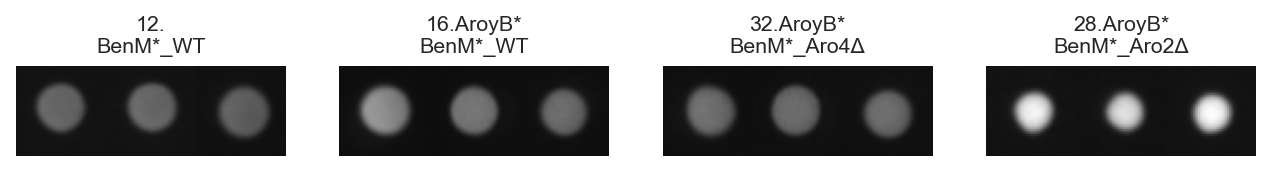

In [27]:
#generate plate map for agar array:
# we repeat the code used to program the robot used to randomised the colony positions:
replicates=4
strains_ID = ['00','08','09', '10','11','12','13','14','15','16','17','19','21','23', '25','26', '27', '28','29','30','31','32']  
np.random.seed(2)
Bank = np.zeros(8*12).astype('str')
Bank[0:len(strains_ID)] = np.array(['Sc_CCM'+ ' ' + str(Sc) for  Sc in strains_ID])
Bank= Bank.reshape(8,12)

#randomly assign genes in a 96wellplate
Wellplate=np.zeros(8*12).astype('str')
positions= np.random.choice(np.arange(96), len(strains_ID)*replicates, replace=0)
Wellplate[positions] = np.array(['Sc_CCM'+ ' ' + str(Sc) for  Sc in strains_ID]).repeat(replicates)

Wellplate = Wellplate.reshape(8,12)


ScCCM013_96=np.tile(['Filler'], (8,12))
CCM384 =sp.Combine_Plates( Wellplate, ScCCM013_96,ScCCM013_96,ScCCM013_96)

frame_opt=40
plate_map ={1:CCM384}


## display the colony pictures:
fig, axs= plt.subplots(1,4, figsize=(10,6))
axs= axs.flatten()
strains=['Sc_CCM 12','Sc_CCM 16','Sc_CCM 32','Sc_CCM 28' ]

for i_plot, gene in enumerate(strains):


    plates,rows,cols = ca.gene_loc_finder(gene , plate_map)

    replicates=[]
    for i, p in enumerate(plates):
        r=rows[i]
        c= cols[i]
        
        
        #for each rotation we align the 4 colonies
        colony_rotations=[]
        for rotation in ['A','B','C','D']:
            pic = pic_dict['p1_'+rotation][0]/255 #10.2.22
            grid = pic_dict['p1_'+rotation][1]
            pic=np.repeat(np.expand_dims(pic, axis=2),3,axis=2)
            colony=ca.colony_picker(pic, r, c, grid,frame_opt )
            colony_rotations.append(colony)

        colony_rotations = np.vstack((np.hstack((colony_rotations[0],colony_rotations[1])),np.hstack((colony_rotations[2],colony_rotations[3]))))
       

        replicates.append(colony) #colony_rotations
        #plt.imshow(colony)
       # plt.show()
    #stack colony pictures:
  # replicates = np.vstack((np.hstack((replicates[0],replicates[1])),np.hstack((replicates[2],replicates[3]))))
    #some of our quadruplicates didnt grow, we select the one that grew for 16 and 12
    if '16' in gene:
         replicates = np.hstack((replicates[0],replicates[2], replicates[3]))
    else:
         replicates = np.hstack((replicates[1],replicates[2], replicates[3]))
   
    
    #underline edge colonies with red
    
    #name:
    num_strain= gene[-2:]
    name= str(num_strain)+'.'+Pathway[num_strain] + '\n' + Sensor[num_strain] + '_' + KO[num_strain]

    axs[i_plot].axis('off')

    axs[i_plot].imshow(replicates*255,vmin=0, vmax=255)
    axs[i_plot].set_title(name)

plt.show()


### Plot KO confirmation Flow Cytometry Data

In [28]:
from sklearn.mixture import GaussianMixture
path='raw_data/10.10.22_array/'
flow_data =  pd.read_csv(path + 'flowdata.csv', sep=',')

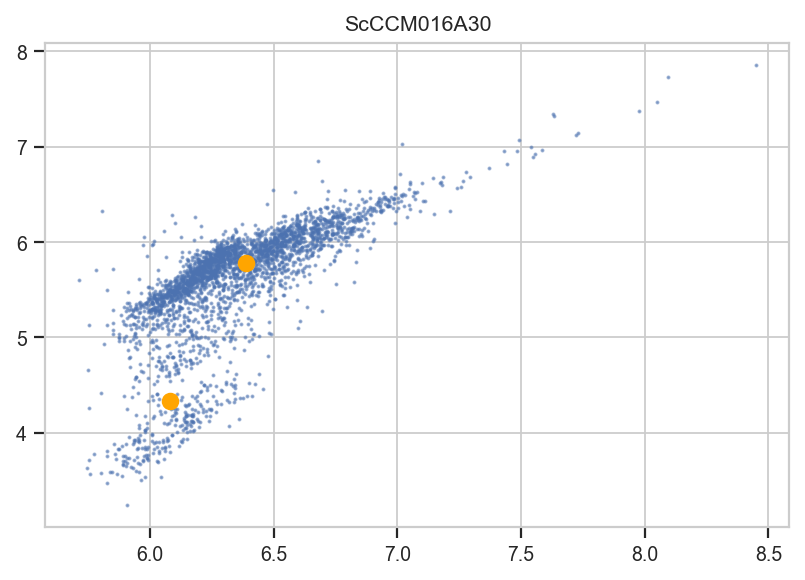

In [29]:
#demonstrate fitting 2 compnents gaussian model:
DF= flow_data.copy()
n_param=2
metrics=['FSC-A','B525-A','SSC-A']
for s , strain in  enumerate(['ScCCM016']):
    for t, time in  enumerate([30]):
        for r, replicate in enumerate(['A']):
            i = (DF.Strain== strain) &( DF.Replicate== replicate) &(DF.time ==time) 
            events = DF[i][metrics].to_numpy()
            i_select=(np.isnan(events)==0) & (np.isinf(events)==0)
            plt.title(strain+ replicate+ str(time))
            plt.scatter(events[i_select.all(axis=1), 0],events[i_select.all(axis=1), 1],s=1, alpha=0.5)
            
            gm =GaussianMixture(n_components=n_param, random_state=0,covariance_type='spherical').fit(events[i_select.all(axis=1)][:,[0,1]])
            plt.scatter(gm.means_[:,0],gm.means_[:,1],s=50, c='orange')
plt.show()

In [30]:
#format data from flow cytometry and fit Gaussian mixture with 2 components to find peaks
# extract peak expectation for largest peak

DF= flow_data
metrics=['B525-A']
Name=[]
Std=[]
Fluo=[]
Size=[]

n_param=2
strains= np.unique( DF.Strain)

Hist =np.empty((len(strains),4,100,3)) #strains, replicate, bins, time
X=np.empty((len(strains),4,100,3)) #strains, replicate, bins, time
GM_mean = np.zeros((len(strains),4,n_param,3)) #strains, replicate, Expectations, n param, time
GM_cov = np.zeros((len(strains),4,n_param,3)) #strains, replicate, covariances, nparam, time
GM_weights =  np.zeros((len(strains),4,n_param,3))
Names = []
for s , strain in  enumerate(strains):
    for t, time in  enumerate([1,5,30]):
        for r, replicate in enumerate(['A', 'B','C','D']):

            i = (DF.Strain== strain) &( DF.Replicate== replicate)&( DF.Size) &(DF.time ==time)
            events = DF[i][metrics].to_numpy()
            i_select=(np.isnan(events)==0) & (np.isinf(events)==0)
            if i_select.all(axis=1).sum()>500:
                gm =GaussianMixture(n_components=n_param, random_state=0,covariance_type='spherical').fit(events[i_select].reshape(-1,1))
                
                counts, bin_edges = np.histogram(events[i_select],bins=100)
                bin_center= np.vstack([bin_edges[0:-1],bin_edges[1:]]).mean(axis=0)   
                
                #sort the models in the mixture by weight:
                sort_weights_i= gm.weights_.argsort()[::-1]

                GM_mean[s,r,sort_weights_i,t] =  gm.means_.flatten() # this has dim  n_param x n_metrics 
                GM_cov[s,r,sort_weights_i,t] = gm.covariances_.flatten()  # this has dim n_param x n_metrics 
                GM_weights[s,r,sort_weights_i,t] = gm.weights_.flatten()
               # print(GM_weights[s,r,:,t])
               # plt.title(strain+ replicate+ str(time))
               # plt.plot(bin_center,counts)
               # plt.vlines(GM_mean[s,r,sort_weights_i[0],t], ymin=0, ymax=150)
               # plt.show()
 
                Hist[s,r,:,t] = counts
                X[s,r,:,t] = bin_center
            else:
                print(i.sum(),i_select.all(axis=1).sum() , strain,'repeat',replicate, 'at time', t,'has less than 1000 count')
               # flow.ScatterplotView(xchannel = "FSC-A",
               #      ychannel = "B525-A",
               #      yscale = "log",
               #      xscale = "log",
               #      subset = "(Strain == '"+strain+"') &(time == 30)&(Replicate == '"+replicate+"')",
               #      huefacet='Size').plot(ex2, alpha = 0.1)
               # plt.show()
       
        


64 64 ScCCM008 repeat A at time 0 has less than 1000 count
66 66 ScCCM008 repeat B at time 0 has less than 1000 count
40 40 ScCCM008 repeat C at time 0 has less than 1000 count
124 124 ScCCM008 repeat D at time 0 has less than 1000 count
63 63 ScCCM008 repeat A at time 1 has less than 1000 count
63 63 ScCCM008 repeat B at time 1 has less than 1000 count
191 191 ScCCM008 repeat C at time 1 has less than 1000 count
182 182 ScCCM008 repeat D at time 1 has less than 1000 count
89 89 ScCCM008 repeat C at time 2 has less than 1000 count
156 156 ScCCM008 repeat D at time 2 has less than 1000 count
14 14 ScCCM009 repeat A at time 0 has less than 1000 count
15 15 ScCCM009 repeat A at time 1 has less than 1000 count
73 73 ScCCM009 repeat A at time 2 has less than 1000 count
161 161 ScCCM010 repeat A at time 0 has less than 1000 count
231 231 ScCCM010 repeat B at time 0 has less than 1000 count
55 55 ScCCM010 repeat C at time 0 has less than 1000 count
196 196 ScCCM010 repeat D at time 0 has less

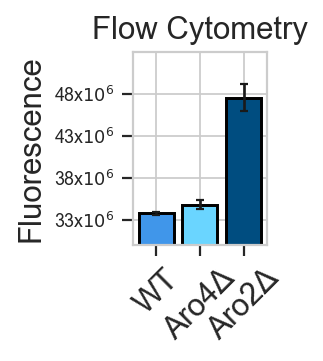

In [31]:


metric='B525-A'
Name=[]
Std=[]
Fluo=[]
Size=[]

strains = np.unique(flow_data.Strain)

strains2plot=['ScCCM016','ScCCM032','ScCCM028'
        ]
t=0 # set time to 0, this the run were strains were read straight from agar


Tick_loc = []
Tick_name = []
means=[]
Bars_std=[]
spacing =140

#fetch fluorescence of strain without GFP:
i = strain_i = np.where(strains=='ScCCM012')[0]
background_fluo = GM_mean[strain_i,:,0,t].mean()


for s, strain in  enumerate(strains2plot):
    strain_i = np.where(strains==strain)[0]
    tic_loc=s*spacing
    num_strain= strain[-2:]
    name=  KO[num_strain]
    
    Fitted_mean = []
    for r, replicate in enumerate(['A', 'B','C','D']):
        fitted_mean = GM_mean[strain_i,r,0,t]
        #strains, replicate, bins, time
        if fitted_mean !=0:
           # ax.plot(Hist[strain_i,r,:,t].T+tic_loc,X[strain_i,r,:,t].T, c= colors[s], alpha=0.0)
            Fitted_mean.append(fitted_mean)
    
    mean = np.power(Fitted_mean,10)#/background_fluo
    std_of_means =np.power(Fitted_mean,10) #/background_fluo
    

    Tick_name.append(name)
    Tick_loc.append(tic_loc+spacing)
    means.append(mean)
    



H=1.6 #figure hight
fig, ax = plt.subplots(figsize=(1.625*H/2.4,H))

colors=[default_color,low_color, high_color]

Bars_mean=[np.mean(x) for x in means]
Bars_std=[np.std(x) for x in means]
tick_loc = np.arange(len(Bars_mean))
ax.bar(tick_loc,Bars_mean,yerr=Bars_std, color= colors,edgecolor=edgecolor,capsize=H,linewidth =H/1.2)

ax.xaxis.set_ticks(tick_loc)
ax.set_title('')
ax.set_xticklabels(Tick_name,rotation = 45, size=H*5)
ax.set_ylabel('Fluorescence')
ax.set_title('Flow Cytometry')

ax.set_ylim([0,50300000])


ax.set_ylabel('Fluorescence', size=H*5)



ax.set_ylim([3*10**7,5.3*10**7 ])

ax.yaxis.set_ticks(np.arange(3.3*10**7, 5.3*10**7, 5*10**6))
ylabels = ax.get_yticks()
ylabels = [int(y)/1000000 for y in ylabels]
ylabels= [str(int(y)) + 'x$10^6$' for y in ylabels]

ax.set_yticklabels(ylabels, size=H*5)


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() ):
    item.set_fontsize(14)

In [32]:
## check for equal variance
print('FLow cytometry')
# Perform the two sample t-test with equal variances

print('WT — Aroy4',stats.ttest_ind(a=means[0], b=means[1], equal_var=True))
print('WT — Aroy2',stats.ttest_ind(a=means[0], b=means[2], equal_var=True))

FLow cytometry
WT — Aroy4 Ttest_indResult(statistic=array([-2.69223428]), pvalue=array([0.04318311]))
WT — Aroy2 Ttest_indResult(statistic=array([-12.80503764]), pvalue=array([5.16930342e-05]))


In [ ]:
means[2].mean()/means[0].mean()

# Figure 3

## Screen Reproducibility

In [ ]:

CCM16= pd.read_csv('/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/CCM18.10.22/GA16_new.csv', sep=',')
CCM19= pd.read_csv('/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/CCM6.12.22/GA19.csv', sep=',')


metrics =['corrected_mean_intensity.24','corrected_area.24','mean_intensity.24','area.24',
         'corrected_mean_intensity.48','corrected_area.48','mean_intensity.48','area.48']
for metric in metrics:
        #we first correct the std using the screens mean
        #we then correct the mean
        CCM16[metric +'_std'] = (CCM16[metric+'_std'])/CCM16[metric+'_mean'].std()
        CCM16[metric +'_mean'] = (CCM16[metric+'_mean']-CCM16[metric+'_mean'].mean())/CCM16[metric+'_mean'].std()
        CCM19[metric +'_std'] = (CCM19[metric+'_std'])/CCM19[metric+'_mean'].std()
        CCM19[metric +'_mean'] = (CCM19[metric+'_mean']-CCM19[metric+'_mean'].mean())/CCM19[metric+'_mean'].std()

In [ ]:
stats.pearsonr(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'])

In [ ]:
from scipy.stats import spearmanr
#color those groups on repeat1vs2 graph:
metric='corrected_mean_intensity.48'
X_df= CCM19.copy()
Y_df= CCM16.copy()


i_nan= ( X_df[metric+'_mean'].isna() |  Y_df[metric+'_mean'].isna()) ==0

std_x = X_df.loc[ i_nan, metric+'_std']
std_y = Y_df.loc[ i_nan,  metric+'_std']
size=  60/((std_x +std_y)/2)

weight= np.vstack([X_df.loc[i_nan , metric+'_std'],Y_df.loc[i_nan , metric+'_std']]).max(axis=0)
weight = (weight.astype(float)*25).astype(int)

PCC, PCC_P = stats.pearsonr(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'])
print(stats.pearsonr(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean']))
#PCC= np.round(PCC, 6)

fig, ax = plt.subplots(figsize=(2/1.5,1.4/1.5))

ax.set_title(' Figure  (PCC:' +str(PCC) +')')
#ax.set_xlabel( 'Repeat1') #Selection
#ax.set_ylabel('Repeat2',)
ax.scatter(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'],s=0.4 , alpha=0.5 , color='k' )#s=size.astype(float).values
print('PCC, PCC_P:',PCC, PCC_P)
#fig.tight_layout()
#ax.axis('off')
plt.show()



In [ ]:
2del

path = 'Raw_Data/screen_data/'
CCM16_19= pd.read_csv(path + 'GA16_19.csv', sep=',')

DF = CCM16_19.copy()

metrics = ['corrected_mean_intensity.48','corrected_area.48']

for metric in metrics:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()
        
metric = 'corrected_mean_intensity.48'

i_nan = DF[metric+'_mean'].isna() ==0
i_sort =  DF[i_nan][metric+'_mean'].argsort()[::-1]

corpus ='gene' +'\t'+ 'screen' +'\t'+ 'rank'+'\t'+ 'fluo_intensity.48H_mean'  +'\t'+ 'fluo_intensity.48H_std'  +'\n'

for rank, i in enumerate(i_sort):
    line = ''
    line += DF[i_nan].iloc[i].gene  +'\t'
    line += 'KO_pooled' +'\t'
    line += str(rank+1) +'\t'
    line += str(np.round(DF[i_nan].iloc[i]['corrected_mean_intensity.48_mean'],3 )) +'\t'
    line += str(np.round(DF[i_nan].iloc[i]['corrected_mean_intensity.48_std'],3 )) +'\t'
    line += '\n'
    corpus += line
    
    
path = '/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/All_Data/'
CCM20= pd.read_csv(path + 'GA20.csv', sep=',')
CCM20.loc[CCM20.gene=='Control-his3d-SW', 'gene'] ='WT'
DF = CCM20.copy()

metrics = ['corrected_mean_intensity.48','corrected_area.48']

for metric in metrics:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()
        
metric = 'corrected_mean_intensity.48'

i_nan = DF[metric+'_mean'].isna() ==0
i_sort =  DF[i_nan][metric+'_mean'].argsort()[::-1]

for rank, i in enumerate(i_sort):
    line = ''
    line += DF[i_nan].iloc[i].gene  +'\t'
    line += 'OEx' +'\t'
    line += str(rank+1) +'\t'
    line += str(np.round(DF[i_nan].iloc[i]['corrected_mean_intensity.48_mean'],3 )) +'\t'
    line += str(np.round(DF[i_nan].iloc[i]['corrected_mean_intensity.48_std'],3 )) +'\t'
    corpus += line +'\n'
    
with open("/Users/paucac/Downloads/CCM_ranks.txt", "w") as text_file:
    text_file.write(corpus)

In [ ]:
#produce middle figure
path = 'Raw_Data/screen_data/'
CCM19= pd.read_csv(path + 'GA19.csv', sep=',')

#change DF to CCM19 (KO) or CCM20 (OEx) to visualise the screens
DF = CCM19.copy()

metrics = ['corrected_mean_intensity.48','corrected_area.48']

for metric in metrics:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()
        
        

from scipy.stats import mannwhitneyu
metric = 'corrected_mean_intensity.48'



i_nan = DF[metric+'_mean'].isna() ==0

i_sort =  DF[i_nan][metric+'_mean'].argsort()[::-1]
i_sort_top =  (DF[i_nan][metric+'_mean']).argsort()[::-1]
i_sort_bottom =  (DF[i_nan][metric+'_mean']).argsort()[::-1]

n_genes= 6#int(0.02*(DF[ metric+'_mean'].isna()==0).sum())
i_middle_group =  np.arange(len( DF[i_nan])/2-n_genes/2,len( DF[i_nan])/2+n_genes/2+2)
i_top_group =  np.arange(0,n_genes)
i_bottom_group =  np.arange(-n_genes,0)

i_all= np.arange(i_nan.sum())
All= DF[i_nan].iloc[i_sort][metric+'_mean']
All_err= DF[i_nan].iloc[i_sort][metric+'_std']

Top = DF[i_nan].iloc[i_sort_top].iloc[i_top_group][metric+'_mean']
Top_err = DF[i_nan].iloc[i_sort_top].iloc[i_top_group][metric+'_std']
Top_genes = DF[i_nan].iloc[i_sort_top].iloc[i_top_group]['gene'].values

#Top_genes = DF[i_nan].iloc[i_sort_top].iloc[i_top_group]['gene'].values
Middle =  DF[i_nan].iloc[i_sort].iloc[i_middle_group][metric+'_mean']
Middle_err = DF[i_nan].iloc[i_sort].iloc[i_middle_group][metric+'_std']
Middle_genes =  DF[i_nan].iloc[i_sort].iloc[i_middle_group]['gene'].values
                                                                    
Bottom = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group][metric+'_mean']
Bottom_err = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group][metric+'_std']
Bottom_genes = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group]['gene'].values

i_WT= DF[i_nan].iloc[i_sort].gene =='WT'
WT_score=DF[i_nan].iloc[i_sort][i_WT][metric+'_mean']
WT_err=DF[i_nan].iloc[i_sort][i_WT][metric+'_std']

Bottom_color=[106/255,213/255,255/255]
Middle_color=[64/255,150/255,234/255]
Top_color=[0/255,77/255,128/255]




H=3.6 #figure hight
fig, axs = plt.subplots(figsize=(H,H))
i = list(set(np.arange(0,len(i_all), 1))-set(i_top_group)-set(i_bottom_group)-set(i_middle_group))
axs.errorbar(i_all[i], All.iloc[i], All_err.iloc[i], linestyle='', marker = '.', color='k', alpha=0.1)
#axs.errorbar(i_all[i], All.iloc[i], All_err.iloc[i], linestyle='', marker = '_', color='k', alpha=0.08)
axs.errorbar(i_middle_group, Middle, Middle_err, c=Middle_color , marker = 'o',  markersize=H*1.5,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1)
axs.errorbar(i_top_group,Top, Top_err, c=Top_color, marker = 'o',  markersize=H*1.5,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1 )
axs.errorbar(i_bottom_group+len(i_all),Bottom, Bottom_err, c=Bottom_color, marker = 'o',  markersize=H*1.5, capsize=H, elinewidth=H, markeredgewidth=H/2 , alpha=1)
axs.errorbar(np.where(i_WT)[0], WT_score,WT_err, linestyle='', marker = 'o',  markersize=H*1.5, color='red' ,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1)


axs.set_title('Top, Middle and Bottom Ranks',fontsize=H*2.5)
axs.set_xlabel('Gene Rank',fontsize=H*2.5)
axs.set_ylabel('Fluorescence Intensity Rank',fontsize=H*2.5)
axs.xaxis.set_ticks(np.arange(0,4501,1000))
axs.tick_params(axis='x',labelsize=H*2.5,rotation = 45)
axs.tick_params(axis='y',labelsize=H*2.5)
#ax.set_xticklabels(tick_names,rotation = 45, size=H*5, fontname='Helvetica')

axs.yaxis.set_label_position("right")
axs.yaxis.tick_right()
U1, p = mannwhitneyu( Top, Middle)
print('top middle difference',p)
U1, p = mannwhitneyu(Middle, Bottom)
print('middle down difference',p)
plt.ylim([-17, 12])
#plt.xlim([-10,100])





In [ ]:
#calculate Zscore

GA_pooled = pd.read_csv(path + 'GA16_19.csv', sep=',')
QD_pooled = pd.read_csv(path + 'QD16_19.csv', sep=',')
GA19 = pd.read_csv(path + 'GA19.csv', sep=',')
QD19 = pd.read_csv(path + 'QD19.csv', sep=',')
GA20= pd.read_csv(path + 'GA20.csv', sep=',')
QD20= pd.read_csv(path + 'QD20.csv', sep=',')

DF = GA20.copy()
metric = 'corrected_mean_intensity.48'
i_nan = DF[metric+'_mean'].isna() ==0

DF_QD= QD20.copy()
## Calculte mean Z of top2.5% and bottom 2.5%
# retrieve middle genes colonies scores
gate_QD = (DF_QD[metric].isna()==0) & (DF_QD.gene.isin(Middle_genes))
set(Middle_genes) == set(DF_QD[gate_QD].gene)
middle_control = DF_QD[gate_QD][metric]


i_sort_top =  (DF[i_nan][metric+'_mean']-0*DF[i_nan][metric+'_std']).argsort()[::-1]
Z_top =  (DF[i_nan].iloc[i_sort_top][metric+'_mean']-middle_control.mean() )/(DF[i_nan].iloc[i_sort_top][metric+'_std'])


i_sort_bottom =  (DF[i_nan][metric+'_mean']+0*DF[i_nan][metric+'_std']).argsort()[::-1]
Z_bottom =  (DF[i_nan].iloc[i_sort_bottom][metric+'_mean']-middle_control.mean() )/(DF[i_nan].iloc[i_sort_bottom][metric+'_std'])

print('top 2% have mean Z:', Z_top[0:int(0.2*len(Z_top))].mean())
print('bottom 2% have mean Z:',Z_bottom[-int(0.2*len(Z_bottom)):].mean())


## number of genes quatified
(GA_pooled[metric+'_mean'].isna()==0).sum(), len(GA_pooled), (GA_pooled[metric+'_mean'].isna()==0).sum()/ len(GA_pooled)



## Display yeast colonies

In [ ]:
%%time

rotations={'A':0, 'B':270, 'C':180,'D':90}
#to avoid reopenning images and find their grids for each colony we store the images and the grids in a dict:
mediums={ 
         #'29.4.22_H24' :'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX29.4.22/YUGN/H24'}
         #'10.2.22_H48':'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX10.2.22/H48/Shuffle_1',
        # '10.2.22_H24':'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX10.2.22/H24/Shuffle_1',
        'fluoA': 'Raw_Data/plate_images/screen19_6.12.22/H48/fluo/',
        'fluoB': 'Raw_Data/plate_images/screen19_6.12.22/H48/fluo/',
        'fluoC': 'Raw_Data/plate_images/screen19_6.12.22/H48/fluo/',
        'fluoD': 'Raw_Data/plate_images/screen19_6.12.22/H48/fluo/',
        'white':  'Raw_Data/plate_images/screen19_6.12.22/H48/white/'}

pic_dict={}


screen='white'
image_path =mediums[screen]
plate_path_dict={}
for filename in tqdm(os.listdir(image_path)):
    if '.png' in filename:
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename

for p, plate in plate_path_dict.items():  

        im=skimage.io.imread(plate)[460:1432,530:1990,:]
        im4grid=rgb2gray(im)
        im4grid=ca.check_and_negate(im4grid, negate=1)
        #im4grid =  ca.prepare_yellowness_image(im, ca.YPD_yellow)
        grid, griddist = ca.make_grid_auto(im4grid, '32-48')
        pic_dict[screen +'p'+ str(p)]=[im,grid]

screen='fluoA'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('A' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( im_fluo)

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    
    

screen='fluoB'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('B' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( rotate(im_fluo,rotations['B']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    

screen='fluoC'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('C' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess(rotate(im_fluo,rotations['C']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    

screen='fluoD'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('D' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( rotate(im_fluo,rotations['D']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]




In [ ]:
## display the colony pictures:
plate_map = ca.Generate_Plate_Map('Raw_data/library_maps/Biocat_plate_map.txt')
#plate_map= ca.Generate_Plate_Map('/Users/paucac/Documents/PhD/CAB/Yeast Libraries/Tef2_mCherry_SWAT/OEx_plate_map.txt')

H=3.5
fig, axs= plt.subplots(6,3, figsize=(3/4*H,H))
axs= axs.flatten()
frame_opt= 30
group_select= Middle_genes[-6:]
group_select= np.hstack([Top_genes[0:6],Middle_genes[-6:],Bottom_genes[-6:]])

for i_plot, gene in enumerate(group_select):

    #find coordinate of colonies in shuffled plate
    plates,rows,cols = ca.gene_loc_finder(gene , plate_map)

    # go and find the picture of the colony on the plate
    white=[]
    fluo=[]
    for i, p in enumerate(plates):
        r=rows[i]
        c= cols[i]
        #fluorescence
        pic = pic_dict['fluoA'+'p'+str(p+1)][0] #10.2.22
        pic=np.repeat(np.expand_dims(pic, axis=2),3,axis=2)
        grid = pic_dict['fluoA'+'p'+str(p+1)][1]
        colony=ca.colony_picker(pic, r, c, grid,frame_opt )
        fluo.append(colony)
        #white 
        pic = pic_dict['white'+'p'+str(p+1)][0] #10.2.22
        grid = pic_dict['white'+'p'+str(p+1)][1]
        colony=ca.colony_picker(pic, r, c, grid,frame_opt )
        white.append(colony)
    #stack colony pictures:
    fluo = np.vstack((np.hstack((fluo[0],fluo[1])),np.hstack((fluo[2],fluo[3]))))
    white = np.vstack((np.hstack((white[0],white[1])),np.hstack((white[2],white[3]))))
    replicates = np.hstack([fluo, white/255])
    #underline edge colonies with red
    #frame the genes selected for comfirmation in red
    if gene in []:
        replicates[-3:,:,:]=[1,0,0]
        replicates[0:3,:,:]=[1,0,0]
        replicates[:,0:3,:]=[1,0,0]
        replicates[:,-3:,:]=[1,0,0] 
    
   # if len(set([0,1,30,31]).intersection(rows))>0 or len(set([0,1,46,47]).intersection(cols))>0:
     #   replicates[0:3,:,:]=[1,0,0]
     #   replicates[:,0:3,:]=[1,0,0]

    axs[i_plot].axis('off')
    axs[i_plot].imshow(replicates,vmin=0, vmax=1)
    axs[i_plot].set_title(gene, size=H*2.4,fontname='Helvetica Neue', pad=0)
plt.show()

In [ ]:
#produce middle figure


CCM20= pd.read_csv(path + 'GA20.csv', sep=',')
CCM20.loc[CCM20.gene=='Control-his3d-SW', 'gene'] ='WT'


DF = CCM20.copy()

metrics = ['corrected_mean_intensity.48','corrected_area.48']

for metric in metrics:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()
        
        

from scipy.stats import mannwhitneyu
metric = 'corrected_mean_intensity.48'



i_nan = DF[metric+'_mean'].isna() ==0

i_sort =  DF[i_nan][metric+'_mean'].argsort()[::-1]
i_sort_top =  (DF[i_nan][metric+'_mean']-0*DF[i_nan][metric+'_std']).argsort()[::-1]
i_sort_bottom =  (DF[i_nan][metric+'_mean']+0*DF[i_nan][metric+'_std']).argsort()[::-1]

n_genes= 6#int(0.02*(DF[ metric+'_mean'].isna()==0).sum())
i_middle_group =  np.arange(len( DF[i_nan])/2-n_genes/2,len( DF[i_nan])/2+n_genes/2+2)
i_top_group =  np.arange(0,n_genes)
i_bottom_group =  np.arange(-n_genes,0)

i_all= np.arange(i_nan.sum())
All= DF[i_nan].iloc[i_sort][metric+'_mean']
All_err= DF[i_nan].iloc[i_sort][metric+'_std']

Top = DF[i_nan].iloc[i_sort_top].iloc[i_top_group][metric+'_mean']
Top_err = DF[i_nan].iloc[i_sort_top].iloc[i_top_group][metric+'_std']
Top_genes = DF[i_nan].iloc[i_sort_top].iloc[i_top_group]['gene'].values

#Top_genes = DF[i_nan].iloc[i_sort_top].iloc[i_top_group]['gene'].values
Middle =  DF[i_nan].iloc[i_sort].iloc[i_middle_group][metric+'_mean']
Middle_err = DF[i_nan].iloc[i_sort].iloc[i_middle_group][metric+'_std']
Middle_genes =  DF[i_nan].iloc[i_sort].iloc[i_middle_group]['gene'].values
                                                                    
Bottom = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group][metric+'_mean']
Bottom_err = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group][metric+'_std']
Bottom_genes = DF[i_nan].iloc[i_sort_bottom].iloc[i_bottom_group]['gene'].values

i_WT= DF[i_nan].iloc[i_sort].gene =='WT'
WT_score=DF[i_nan].iloc[i_sort][i_WT][metric+'_mean']
WT_err=DF[i_nan].iloc[i_sort][i_WT][metric+'_std']

Bottom_color=[106/255,213/255,255/255]
Middle_color=[64/255,150/255,234/255]
Top_color=[0/255,77/255,128/255]




H=3.6 #figure hight
fig, axs = plt.subplots(figsize=(H,H))
i = list(set(np.arange(0,len(i_all), 1))-set(i_top_group)-set(i_bottom_group)-set(i_middle_group))
axs.errorbar(i_all[i], All.iloc[i], All_err.iloc[i], linestyle='', marker = '.', color='k', alpha=0.1)
#axs.errorbar(i_all[i], All.iloc[i], All_err.iloc[i], linestyle='', marker = '_', color='k', alpha=0.08)
axs.errorbar(i_middle_group, Middle, Middle_err, c=Middle_color , marker = 'o',  markersize=H*1.5,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1)
axs.errorbar(i_top_group,Top, Top_err, c=Top_color, marker = 'o',  markersize=H*1.5,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1 )
axs.errorbar(i_bottom_group+len(i_all),Bottom, Bottom_err, c=Bottom_color, marker = 'o',  markersize=H*1.5, capsize=H, elinewidth=H, markeredgewidth=H/2 , alpha=1)
axs.errorbar(np.where(i_WT)[0], WT_score,WT_err, linestyle='', marker = 'o',  markersize=H*1.5, color='red' ,  capsize=H, elinewidth=H, markeredgewidth=H/2, alpha=1)


axs.set_title('Top, Middle and Bottom Ranks',fontsize=H*2.5)
axs.set_xlabel('Gene Rank',fontsize=H*2.5)
axs.set_ylabel('Fluorescence Intensity Rank',fontsize=H*2.5)
axs.xaxis.set_ticks(np.arange(0,4501,1000))
axs.tick_params(axis='x',labelsize=H*2.5,rotation = 45)
axs.tick_params(axis='y',labelsize=H*2.5)
#ax.set_xticklabels(tick_names,rotation = 45, size=H*5, fontname='Helvetica')

axs.yaxis.set_label_position("right")
axs.yaxis.tick_right()
U1, p = mannwhitneyu( Top, Middle)
print('top middle difference',p)
U1, p = mannwhitneyu(Middle, Bottom)
print('middle down difference',p)
plt.ylim([-17, 12])
#plt.xlim([-10,100])





In [ ]:
%%time

rotations={'A':0, 'B':270, 'C':180,'D':90}
#to avoid reopenning images and find their grids for each colony we store the images and the grids in a dict:
mediums={ 
         #'29.4.22_H24' :'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX29.4.22/YUGN/H24'}
         #'10.2.22_H48':'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX10.2.22/H48/Shuffle_1',
        # '10.2.22_H24':'/Users/paucac/Documents/PhD/CAB/CRISPA/CRISPA_plates/BTX10.2.22/H24/Shuffle_1',
        'fluoA': 'Raw_Data/plate_images/screen20_23.3.15/fluo/',
        'fluoB': 'Raw_Data/plate_images/screen20_23.3.15/fluo/',
        'fluoC': 'Raw_Data/plate_images/screen20_23.3.15/fluo/',
        'fluoD': 'Raw_Data/plate_images/screen20_23.3.15/fluo/',
        'white':'Raw_Data/plate_images/screen20_23.3.15/white/'}

pic_dict={}


screen='white'
image_path =mediums[screen]
plate_path_dict={}
for filename in tqdm(os.listdir(image_path)):
    if '.png' in filename:
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename

for p, plate in plate_path_dict.items():  

        im=skimage.io.imread(plate)[460:1432,530:1990,:]
        im4grid=rgb2gray(im)
        im4grid=ca.check_and_negate(im4grid, negate=1)
        #im4grid =  ca.prepare_yellowness_image(im, ca.YPD_yellow)
        grid, griddist = ca.make_grid_auto(im4grid, '32-48')
        pic_dict[screen +'p'+ str(p)]=[im,grid]

screen='fluoA'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('A' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( im_fluo)

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    
    

screen='fluoB'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('B' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( rotate(im_fluo,rotations['B']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    

screen='fluoC'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('C' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess(rotate(im_fluo,rotations['C']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]
    
    

screen='fluoD'
image_path =mediums[screen]
plate_path_dict={}
for filename in os.listdir(image_path):
    if ('.Tif' in filename) and ('D' in filename.upper()):
        i = filename.index('p') + 1
        plate_num = int(filename[i:i+2])               
        plate_path_dict[plate_num] = image_path+ '/' + filename



for p, plate in tqdm(plate_path_dict.items()):   

    im_fluo=skimage.io.imread(plate)

            #skimage.io.imread(plate_path_dict[p]['White'])
    im_fluo,[angle,top,bottom,left,right]=ca.Velber_Preprocess( rotate(im_fluo,rotations['D']))

    #now that im_fluo is cropped (lighter) we polish the alignment
        #now that the image is lighter we polish the alignment:
    im_fluo,a = ca.Rotate_Plate(im_fluo , 0.2)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.1)
    im_fluo ,a = ca.Rotate_Plate(im_fluo , 0.05)
    grid, griddist = ca.make_grid_auto(im_fluo, '32-48')
    pic_dict[screen +'p'+ str(p)]=[im_fluo,grid]




In [ ]:
## display the colony pictures:
plate_map= ca.Generate_Plate_Map('raw_data/library_maps/OEx_plate_map.txt')

H=3.5
fig, axs= plt.subplots(6,3, figsize=(3/4*H,H))
axs= axs.flatten()
frame_opt= 30
group_select= Middle_genes[-6:]
group_select= np.hstack([Top_genes[0:6],Middle_genes[-6:],Bottom_genes[-6:]])

for i_plot, gene in enumerate(group_select):

    #find coordinate of colonies in shuffled plate
    plates,rows,cols = ca.gene_loc_finder(gene , plate_map)

    # go and find the picture of the colony on the plate
    white=[]
    fluo=[]
    for i, p in enumerate(plates):
        r=rows[i]
        c= cols[i]
        #fluorescence
        pic = pic_dict['fluoA'+'p'+str(p+1)][0] #10.2.22
        pic=np.repeat(np.expand_dims(pic, axis=2),3,axis=2)
        grid = pic_dict['fluoA'+'p'+str(p+1)][1]
        colony=ca.colony_picker(pic, r, c, grid,frame_opt )
        fluo.append(colony)
        #white 
        pic = pic_dict['white'+'p'+str(p+1)][0] #10.2.22
        grid = pic_dict['white'+'p'+str(p+1)][1]
        colony=ca.colony_picker(pic, r, c, grid,frame_opt )
        white.append(colony)
    #stack colony pictures:
    fluo = np.vstack((np.hstack((fluo[0],fluo[1])),np.hstack((fluo[2],fluo[3]))))
    white = np.vstack((np.hstack((white[0],white[1])),np.hstack((white[2],white[3]))))
    replicates = np.hstack([fluo, white/255])
    #underline edge colonies with red
    #frame the genes selected for comfirmation in red
    if gene in []:
        replicates[-3:,:,:]=[1,0,0]
        replicates[0:3,:,:]=[1,0,0]
        replicates[:,0:3,:]=[1,0,0]
        replicates[:,-3:,:]=[1,0,0] 
    
   # if len(set([0,1,30,31]).intersection(rows))>0 or len(set([0,1,46,47]).intersection(cols))>0:
     #   replicates[0:3,:,:]=[1,0,0]
     #   replicates[:,0:3,:]=[1,0,0]

    axs[i_plot].axis('off')
    axs[i_plot].imshow(replicates,vmin=0, vmax=1)
    axs[i_plot].set_title(gene, size=H*2.4,fontname='Helvetica Neue', pad=0)
plt.show()

# Figure 5

### HPLC - ARRAY Validation

In [ ]:
array23522= pd.read_csv('raw_data/23.5.22_array/GA_print3.csv', sep=',')
array23410= pd.read_csv('raw_data/23.4.10_array/GA_print3.csv', sep=',')


 # we also normalise the rearrayed dfs
metrics =['corrected_mean_intensity.24','corrected_area.24','mean_intensity.24','area.24',
         'corrected_mean_intensity.48','corrected_area.48','mean_intensity.48','area.48']
for metric in metrics:
    for DF in [array23522,array23410]:
        #we first correct the std using the screens mean
        #we then correct the mean
        i_ScCCM16_WT = DF.gene == 'ScCCM16_WT'
        ScCCM16_WT_mean =DF[i_ScCCM16_WT][metric+'_mean'].values
        ScCCM16_WT_std =DF[i_ScCCM16_WT][metric+'_std'].values  
        
        DF[metric +'_std'] = (DF[metric+'_std'])/ScCCM16_WT_std
        DF[metric +'_mean'] = (DF[metric+'_mean']-ScCCM16_WT_mean)/ScCCM16_WT_std



In [ ]:
i_ScCCM16_WT = DF.gene == 'ScCCM16_WT'
DF[i_ScCCM16_WT][metric+'_mean'].values

In [ ]:
## load data and normalize
#data produced with KO_OEx 20230522.ipynb
array23522= pd.read_csv('raw_data/23.5.22_array/GA_print3.csv', sep=',')
array23410= pd.read_csv('raw_data/23.4.10_array/GA_print3.csv', sep=',')


CCM_pooled =pd.read_csv('raw_data/screen_data/GA16_19.csv', sep=',')
CCM20 =pd.read_csv('raw_data/screen_data/GA20.csv', sep=',')


#change a few gene names for consistency
DFs = [CCM20, CCM_pooled]
for DF in DFs:
    #VMA16 is called PPA1 we change this:
    DF.loc[DF.gene == 'PPA1','gene']='VMA16'
    #HEM25 is called YDL119C we change this:
    DF.loc[DF.gene == 'YDL119C','gene'] = 'HEM25'
    
CCM20.loc[CCM20.gene=='Control-his3d-SW', 'gene'] ='WT'

metrics = ['corrected_mean_intensity.48','corrected_area.48']

for metric in metrics:
    for DF in DFs:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()
  
 # we also normalise the rearrayed dfs
metrics =['corrected_mean_intensity.24','corrected_area.24','mean_intensity.24','area.24',
         'corrected_mean_intensity.48','corrected_area.48','mean_intensity.48','area.48']
for metric in metrics:
    for DF in [array23522,array23410]:
        #we first correct the std using the screens mean
        #we then correct the mean
        DF[metric +'_std'] = (DF[metric+'_std'])/DF[metric+'_mean'].std()
        DF[metric +'_mean'] = (DF[metric+'_mean']-DF[metric+'_mean'].mean())/DF[metric+'_mean'].std()


In [ ]:
strain2crispa= {}
strain2crispa['ADE12'] = 'ADE12'
strain2crispa['AIM22'] = 'AIM22'
strain2crispa['ARG5,6'] = 'ARG5,6'
strain2crispa['FLO10'] = 'FLO10'
strain2crispa['LPD1'] = 'LPD1'
strain2crispa['LYS14'] = 'LYS14'
strain2crispa['MET14'] = 'MET14'
strain2crispa['PDA1'] = 'PDA1'
strain2crispa['SNF7'] = 'SNF7'
strain2crispa['VPS20'] = 'VPS20'
strain2crispa['YIL059C'] = 'YIL059C'
strain2crispa['YNL028W'] = 'YNL028W'
strain2crispa['CCM19_WT'] = 'WT'
strain2crispa['ScCCM74_LPD1'] = 'LPD1'
strain2crispa['ScCCM16_WT_select'] = 'WT'
strain2crispa['ScCCM16_WT'] = 'WT'

strain2crispa['ScCCM23_ZWF1'] = 'ZWF1'
strain2crispa['ScCCM28_ARO2'] = 'ARO2'
strain2crispa['ScCCM72_VPS20'] = 'VPS20'
strain2crispa['ScCCM73_PDA1'] = 'PDA1'
strain2crispa['ScCCM74_LPD1'] = 'LPD1'
strain2crispa['ScCCM75_AIM22'] = 'AIM22'
strain2crispa['ScCCM77_LYS14'] = 'LYS14'
strain2crispa['ScCCM78_MET14'] = 'MET14'

strain2crispa['ScCCM88_GCR1'] = 'GCR1'
strain2crispa['ScCCM89_MET6'] = 'MET6'
strain2crispa['ScCCM90_GLO4'] = 'GLO4'
strain2crispa['ScCCM91_GSH1'] = 'GSH1'
strain2crispa['ScCCM92_TDH3'] = 'TDH3'
strain2crispa['ScCCM94_FOB1'] = 'FOB1'
strain2crispa['ScCCM95_RIB5'] = 'RIB5'
strain2crispa['ScCCM96_YLL058W'] = 'YLL058W'
strain2crispa['ScCCM97_UK'] = 'WT'

In [ ]:
ko_group =['AIM22','ARG5,6','LPD1','LYS14','MET14','PDA1',
 'SNF7','VPS20','ADE12','ScCCM16_WT']
oex_group =['ScCCM88_GCR1','ScCCM89_MET6','ScCCM90_GLO4','ScCCM91_GSH1','ScCCM92_TDH3',
            'ScCCM94_FOB1','ScCCM95_RIB5','ScCCM96_YLL058W','ScCCM16_WT']


In [ ]:
##### we plot the data from different sets on the same graph

#we first plot the KO and then the
X = []
Y =[]
Xerr=[]
Yerr=[]
G=[]
S=[]
Not_in_CRISPA =[]
x_metric = 'corrected_mean_intensity.48'
y_metric =  'mean_intensity.48'

#start with the KO:
X_DF=  CCM_pooled.copy()
Y_DF = array23522.copy() #array23410.copy()


for gene in ko_group:
    
    good =((X_DF.gene == strain2crispa[gene]).sum() >=1) & ((Y_DF.gene == gene).sum() >=1)
    
    if good:
        x=X_DF[X_DF.gene == strain2crispa[gene]][x_metric +'_mean']
        X.append(x)
        xerr=  X_DF[X_DF.gene == strain2crispa[gene]][x_metric +'_std']
        Xerr.append(xerr)
        y=Y_DF[Y_DF.gene == gene][y_metric +'_mean']
        Y.append(y)
        Yerr.append(Y_DF[Y_DF.gene == gene][y_metric +'_std'])
        g = gene #+'.'+gene2strain[gene][-2:]
        G.append(g)
        
    else:
        Not_in_CRISPA.append(gene)
    
#start with the KO:
X_DF=  CCM20.copy()
Y_DF = array23522.copy()   
x_metric = 'corrected_mean_intensity.48'
y_metric =  'mean_intensity.48'
for gene in oex_group:
    
    good =((X_DF.gene == strain2crispa[gene]).sum() >=1) & ((Y_DF.gene == gene).sum() >=1)
    
    if good:
        print(gene)
        x=X_DF[X_DF.gene == strain2crispa[gene]][x_metric +'_mean']
        X.append(x)
        xerr=  X_DF[X_DF.gene == strain2crispa[gene]][x_metric +'_std']
        Xerr.append(xerr)
        y=Y_DF[Y_DF.gene == gene][y_metric +'_mean']
        Y.append(y)
        Yerr.append(Y_DF[Y_DF.gene == gene][y_metric +'_std'])
        g = gene #+'.'+gene2strain[gene][-2:]
        G.append(g)
        
    else:
        Not_in_CRISPA.append(gene)

        
H =3
fig, axs= plt.subplots(figsize=(H,H))
color =['k' for _ in range(len(G))]
for i, gene in enumerate(G):
    if 'WT' in gene:
        color='k'
    elif gene in ko_group:
        color=Middle_color
        alpha=1
    elif gene in oex_group:
        color = Top_color
        alpha=1
    else:
        color=Middle_color
        alpha=1

    #we do two layers, one for point edge and second for errorbar and alpha
    axs.scatter(X[i],y=Y[i], color=color, edgecolors=color, s=10)
    axs.errorbar(x=X[i],y=Y[i],xerr=Xerr[i],yerr=Yerr[i],c=color, alpha=alpha, fmt=".",
                capsize=H/3, elinewidth=H/3, markeredgewidth=H/3, markersize=H/3)
axs.set_ylabel('Re-arrayed Colony Fluorescence (AU)',fontsize=H*2.7)
axs.set_xlabel('CRI-SPA Screen Fluorescence (AU)',fontsize=H*2.7)

#axs.spines['top'].set_visible(False)
#axs.spines['right'].set_visible(False)
axs.set_title('Re-Array Confirmation',fontsize=H*2.7)
#axs.set_ylim([0.0015,0.002])
#xlims=[-3,3.3]
#axs.set_xlim([0.0015,0.002])
axs.tick_params(axis='both', which='major', labelsize=H*2.7)
axs.tick_params(axis='x',labelsize=H*2.7)
axs.tick_params(axis='y',labelsize=H*2.7)

adjust=0.1
for (gene,x,y) in  zip(G ,list(X),list(Y)):
    #if strain2crispa[gene] not in ['ARG5,6','MET14', 'WT', 'GSH1', 'YLL058W','RIB5','LPD1','LYS14', 'AIM22']:
        axs.annotate(strain2crispa[gene], (x+4*10e-3,4*10e-3+y+adjust),fontsize=H*2.4) 

plt.show()


pcc, pcc_p= np.round(stats.pearsonr(np.hstack(X),np.hstack(Y))[0:2],8)
slope, intercept,  R2, p_value, std_err = stats.linregress(np.hstack(X),np.hstack(Y))
print('PCC', pcc ,'p_val', pcc_p)

## HPLC From 23.5.26

In [ ]:
strain2gene={}
strain2gene['ScCCM88'] = 'GCR1'
strain2gene['ScCCM89'] = 'MET6'
strain2gene['ScCCM90'] = 'GLO4'
strain2gene['ScCCM91'] = 'GSH1'
strain2gene['ScCCM92'] = 'TDH3'
strain2gene['ScCCM94'] = 'FOB1'
strain2gene['ScCCM95'] = 'RIB5'
strain2gene['ScCCM96'] = 'YLL058W'
strain2gene['ScCCM97'] = 'UK'
strain2gene['ScCCM16'] = 'WT'
strain2gene['ScCCMbio16'] = 'IGNORE'
strain2gene['MET14.CCM19']= 'MET14_KO'
strain2gene['MET14']= 'MET14'
strain2gene['LPD1']= 'LPD1'
strain2gene['AIM22']= 'AIM22'
strain2gene['ARG5,6']= 'ARG5,6'
strain2gene['LYS14']= 'LYS14'
strain2gene['PDA1']= 'PDA1'

#reverse dict
gene2strain={}
for s, g in strain2gene.items():
    gene2strain[g]=s


data_path= 'Raw_Data/23.5.26_HPLC/'
HPLC_map = pd.read_csv(data_path+ 'HPLC_map.csv' ).astype(str)
HPLC_map=HPLC_map.iloc[:8, 1:13]



## read OD /GFP readouts in culture before HPLC
path= '/Users/paucac/Documents/PhD/CAB/CRISPA/HPLC/CCM/23.5.26/'
file_name = 'HPLC_OD230526.xlsx'

HPLC_map =  HPLC_map.values.reshape(-1)[0:96]


HPLC_map=HPLC_map[HPLC_map!='nan']

strains = [g[:g.index('_')] if '_' in g else g for g in HPLC_map]
genes = [strain2gene[g] if ('std' not in g) and ('BLANK' not in g) and ('ERROR' not in g)  else g for g in strains]

modif_type = ['OEx' if 'ScCCM' in g else 'KO' for g in HPLC_map] 


dilution_factor =2

##load data

columns =['No' ,'Injection_Name','Ret_Time' ,'Area' ,'Height' ,'Amount' ,'Rel_Area','Peak_Type'  ]
hplc_file ='HPLC23.5.26_UV_VIS_4.xlsx'
HPLC_CCM=pd.read_excel(data_path+ hplc_file, skiprows=14, names=columns).astype(str)
HPLC_CCM=HPLC_CCM.iloc[:95,:]
HPLC_CCM=HPLC_CCM.replace('n.a.',0)
HPLC_CCM = HPLC_CCM[HPLC_CCM!='']
# the samples were diluted 8X during sample prep. We remultiply back X8
back_dilute=8


#alphabet match
alphabet={}
for i,L in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    alphabet[L] = i +1
    

HPLC_CCM['gene']=genes
HPLC_CCM['strain']=strains
HPLC_CCM['type']= modif_type 

HPLC_CCM23526 = HPLC_CCM.copy()

In [ ]:
X_YKO=[]
Y_YKO=[]

P=[] #stores the p value for CCM

genes = ['MET6', 'GCR1', 'GLO4','GSH1','TDH3','RIB5','YLL058W','WT','MET14','LPD1','AIM22','ARG5,6','LYS14','PDA1']
#genes = [  'WT','MET14','LPD1','AIM22','ARG5,6','LYS14','PDA1']
genes = ['YLL058W','FOB1','MET6','TDH3','ARG5,6','RIB5', 'GLO4', 'GCR1','LYS14','MET14','GSH1','AIM22','PDA1','WT','LPD1']

#
i= (HPLC_CCM['gene'].str.contains('WT'))
WT_score = HPLC_CCM['Amount'][i].values.astype(str)
WT_score = [s.replace(',','.') if ',' in s else s for s in WT_score ]
WT_score = np.stack(WT_score  ).astype(float)


for g in  genes:#4,  3,5,6,4,7,8
    X_YKO.append(g)
    #'time' '6d'/'3d', 
    #'bioreplicate' 1'/'2'
    
    i= (HPLC_CCM['gene'].str.contains(g))#
    #& (HPLC_CCM['type']=='KO')    
    y = HPLC_CCM['Amount'][i].values.astype(str)
    #this one liner replaces commas to dots 
    y = [s.replace(',','.') if ',' in s else s for s in y ]
    
    #we have more repeats (5) for the WT we therefore use default size of 5 for each strain
    # we fill the 2 remaining positions with nans
    default_array = np.zeros(5)*np.nan
    default_array[0:len(y)]=y  
    y =  default_array
    

    #alternative = 'less' if gene in ['ADE12','SNF7','VPS20'] else 'greater'
    gene_score = y[np.isnan(y)==0] #ignore nans
   # print(np.mean(gene_score)/ np.mean(WT_score),np.mean(gene_score), np.mean(WT_score))
    t, p = ttest_ind(gene_score, WT_score)
    
    Y_YKO.append(y)
    star = ' *' if p<0.05 else ''
    star = ' **' if p<0.01 else star
    star = ' ***' if p<0.001 else star
    #print(g,y,p,star)

Y_YKO = np.stack(Y_YKO).astype(float)*dilution_factor

H =3
fig, ax = plt.subplots(figsize=(H,H))
colors=[Top_color,Top_color,Top_color,Top_color,Bottom_color,Top_color,Top_color,Top_color,Bottom_color, Bottom_color,
        Top_color,
         Bottom_color, Bottom_color, WT_color, Bottom_color]

#ax.bar(np.arange(Y_YKO.shape[0]) ,Y_YKO.mean(axis=1),yerr=Y_YKO.std(axis=1),
   #    color=colors,edgecolor= edgecolor,linewidth=3,ecolor=edgecolor,capsize=5)

ax.bar(np.arange(Y_YKO.shape[0]), np.nanmean(Y_YKO,axis=1),yerr=np.nanstd(Y_YKO,axis=1),
       color=colors,edgecolor= edgecolor,linewidth=H/2,ecolor=edgecolor,capsize=H/2)
ax.xaxis.set_ticks(np.arange(Y_YKO.shape[0]))
ax.set_ylabel('CCM Titer (mg/L) ',fontsize=H*2.7)

ax.set_xticklabels(X_YKO,rotation = 90, size=H*2.7)
#ax.set_xlim([0, 400])
ax.tick_params(axis='x',labelsize=H*2.7)
ax.tick_params(axis='y',labelsize=H*2.7)
ax.set_title(hplc_file +' CCM Yield (mg/L)')
ax.set_title('Top OEx and KO Hits Validation',fontsize=H*2.7)


plt.show()

